#  Analisis Tarifas

In [324]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [325]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [326]:
data= pd.read_csv('DATA_FINAL_08.csv',sep=';', header = 0)

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
len(data)

In [ ]:
data.shape

In [ ]:
data['COD_NODO'].nunique()

In [ ]:
data.describe()

In [ ]:
data['FECHA'].max()

# PLAN
    1. listar Nodos
    2. Calcular medida tarifa
    3. Ordenar en pivot por mes
    4. Calcular dif Ene_Mayo y dif Ene_Nov
    5. Agrupar
    6. Identificar causas (arbol, cluster u otros)
    
##  Tener en cuenta campos
* 'CD_BLANCOS_CAMBIOS_SERVICIO'
* analisis diferentes por INVOLUNTARIO



In [ ]:
data.columns

In [ ]:
data.head()

In [ ]:
data['INVOLUNTARIO']=np.where(data['CARTERA']==0,0,np.where(data['CARTERA']=='0',0,-1))
data['VOLUNTARIO']=np.where(data['CARTERA']==0,-1,np.where(data['CARTERA']=='0',-1,0))

In [ ]:
data[['INVOLUNTARIO','VOLUNTARIO']].value_counts().to_frame().sort_index()

In [ ]:
def pieChart(col):
    A = col.value_counts()
    indices = A.index
    plt.pie(A, labels=indices, autopct="%0.1f %%", colors=['silver','red'])
    plt.axis("equal")
    plt.show()    

In [ ]:
pieChart(data['VOLUNTARIO'])

In [ ]:
data['CARTERA'].unique()

In [ ]:
data[['FECHA']].value_counts()

In [ ]:
#data[seleccion_variables].sort_values('COD_NODO')

In [ ]:
data_total=data.copy()

### Seleccion variables para medida tarifa

In [ ]:
seleccion_variables=['COD_NODO','FECHA','INVOLUNTARIO','CD_BLANCOS_CAMBIOS_SERVICIO','AVG_TARIFA_TIGO','AVG_TARIFA_ETB','AVG_TARIFA_MOVISTAR','PROM_RENTA']
# no hay precio mega Movistart

In [ ]:
data[seleccion_variables].isnull().sum()

In [ ]:
data[seleccion_variables].isnull().sum()/len(data)

In [ ]:
data[seleccion_variables].describe()

In [ ]:
#alfa=com/nuestro

In [ ]:
data_medida=data[seleccion_variables].copy()

In [ ]:
variables_tarifa=['AVG_TARIFA_TIGO','AVG_TARIFA_ETB','AVG_TARIFA_MOVISTAR']

In [ ]:
data_medida['comp_tarifa']=data_medida[variables_tarifa].min(axis=1)

In [ ]:
data_medida['operador_menor_tarifa']=np.where(data_medida['comp_tarifa']==data_medida['AVG_TARIFA_TIGO'],'AVG_TARIFA_TIGO',
                                              np.where(data_medida['comp_tarifa']==data_medida['AVG_TARIFA_ETB'],'AVG_TARIFA_ETB',
                                                      np.where(data_medida['comp_tarifa']==data_medida['AVG_TARIFA_MOVISTAR'],'AVG_TARIFA_MOVISTAR','NINGUNO'
                                             )))

In [ ]:
data_medida['ALFA_tarifa']=np.where(data_medida['operador_menor_tarifa']=='NINGUNO',np.nan,data_medida['comp_tarifa']/data_medida['PROM_RENTA'])

In [ ]:
data_medida

In [ ]:
data_medida['FECHA'].max()

In [ ]:
resumen_medida=pd.pivot_table(data_medida[['FECHA','COD_NODO','ALFA_tarifa']], columns='FECHA', index='COD_NODO',aggfunc=np.mean)
resumen_medida.columns = resumen_medida.columns.droplevel()
resumen_medida

In [ ]:
data_medida[data_medida['COD_NODO']=='01S'].sort_values('FECHA')

In [ ]:
resumen_medida.isnull().sum()

In [ ]:
resumen_medida.isnull().sum()/len(resumen_medida)

In [ ]:
sns.violinplot(data=resumen_medida)

In [ ]:
resumen_medida.median().to_frame().plot()

In [ ]:
resumen_medida['ene_oct']=resumen_medida[10]-resumen_medida[1]
resumen_medida['ene_may']=resumen_medida[5]-resumen_medida[1]

In [220]:
resumen_medida.describe()

FECHA,1,2,3,4,5,6,7,8,9,10,ene_oct,ene_may
count,6741.000000,6698.000000,6893.000000,7064.000000,6939.000000,7130.000000,7362.000000,7317.000000,7633.000000,7521.000000,5716.000000,5517.000000
mean,0.986862,0.986459,0.986282,0.985155,0.989091,0.985250,0.981769,1.007998,0.889634,0.896673,-0.096479,-0.007082
std,0.222228,0.219783,0.218010,0.216290,0.218906,0.217622,0.211938,0.214597,0.172056,0.169832,0.170847,0.177239
min,0.424251,0.427115,0.443353,0.459624,0.432857,0.421675,0.423495,0.432636,0.367525,0.346936,-0.964745,-1.020891
25%,0.824723,0.824866,0.828721,0.824852,0.829139,0.826536,0.830247,0.854087,0.782884,0.790782,-0.199995,-0.061030
50%,0.976559,0.974808,0.974402,0.976436,0.977812,0.973474,0.973728,0.998418,0.880032,0.887263,-0.111612,0.000709
75%,1.127861,1.122591,1.120084,1.120176,1.123003,1.117394,1.111162,1.135050,0.991742,0.997337,0.015904,0.047504
max,2.567901,2.282624,2.918921,2.256057,2.353665,2.362262,2.378556,2.472470,1.943738,1.918936,0.371453,0.670422


<AxesSubplot:xlabel='FECHA'>

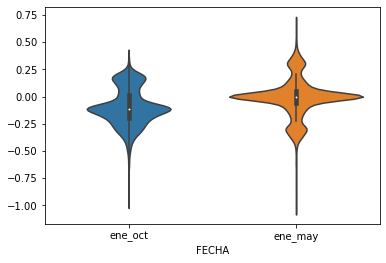

In [221]:
sns.violinplot(data=resumen_medida[['ene_oct','ene_may']])

<AxesSubplot:>

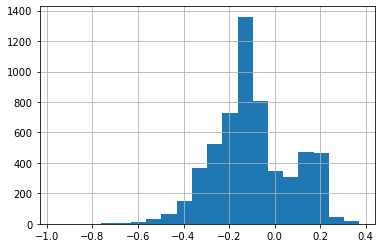

In [222]:
resumen_medida['ene_oct'].hist(bins=20)

<AxesSubplot:>

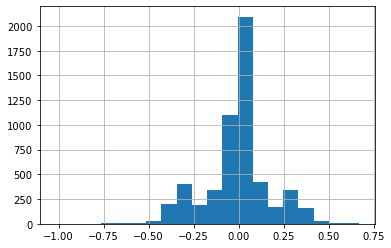

In [223]:
resumen_medida['ene_may'].hist(bins=20)

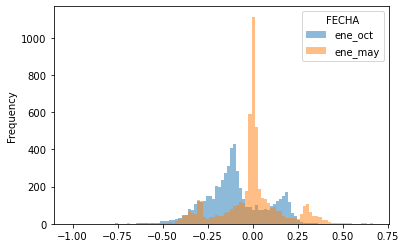

In [224]:
ax = resumen_medida[['ene_oct','ene_may']].plot.hist(bins=100, alpha=0.5)

In [225]:
resumen_medida

FECHA,1,2,3,4,5,6,7,8,9,10,ene_oct,ene_may
COD_NODO,,,,,,,,,,,,
01S,NaN,NaN,0.875348,0.871263,1.209064,0.863952,0.860241,NaN,NaN,1.035875,NaN,NaN
02S,1.274914,0.907934,1.277684,1.258177,1.259581,1.270295,1.254361,0.909536,1.103387,0.957562,-0.317352,-0.015333
0AL,NaN,NaN,0.738222,NaN,0.728679,0.539047,0.760157,NaN,NaN,0.474946,NaN,NaN
0AO,0.810964,NaN,0.988197,1.077074,NaN,NaN,NaN,NaN,0.680075,NaN,NaN,NaN
0AR,1.284109,1.216581,1.298053,1.183848,1.104240,1.320534,1.172261,1.336661,1.033125,1.029064,-0.255045,-0.179869
...,...,...,...,...,...,...,...,...,...,...,...,...
ZUL,1.063994,NaN,1.671811,1.072029,1.091996,1.088498,1.090459,1.112140,1.159577,1.121575,0.057581,0.028003
ZVD,0.986515,0.960976,0.974316,0.979039,0.931441,0.957367,0.953681,0.961424,0.894125,0.844062,-0.142453,-0.055074
ZVG,1.172341,1.176593,1.132425,1.066752,1.174378,1.166202,1.072115,1.195050,1.040057,1.041562,-0.130779,0.002037


In [226]:
resumen_medida.isnull().sum()

FECHA
1          2963
2          3006
3          2811
4          2640
5          2765
6          2574
7          2342
8          2387
9          2071
10         2183
ene_oct    3988
ene_may    4187
dtype: int64

In [227]:
resumen_medida.isnull().sum()/len(resumen_medida)

FECHA
1          0.305338
2          0.309769
3          0.289674
4          0.272053
5          0.284934
6          0.265251
7          0.241344
8          0.245981
9          0.213417
10         0.224959
ene_oct    0.410965
ene_may    0.431472
dtype: float64

In [228]:
resumen_medida['bin_alfa']=pd.cut((resumen_medida['ene_oct']),bins=5,right=True)

In [229]:
resumen_medida['bin_alfa'].value_counts().to_frame().sort_index()

,bin_alfa
"(-0.966, -0.698]",5
"(-0.698, -0.43]",119
"(-0.43, -0.163]",1772
"(-0.163, 0.104]",2823
"(0.104, 0.371]",997


In [230]:
len(resumen_medida)

9704

In [231]:
resumen_medida['ene_oct'].quantile(0.10)

-0.3056786529375847

In [232]:
(resumen_medida['ene_oct']<=-0.25).sum()

988

In [233]:
(resumen_medida['ene_oct']<=-0.25).sum()/len(resumen_medida)

0.10181368507831821

In [234]:
len(resumen_medida)

9704

In [235]:
corte=resumen_medida['ene_oct'].quantile(0.20)
corte

-0.23248164336784183

In [236]:
len(resumen_medida[resumen_medida['ene_oct']<=corte])

1144

###  Segunda parte

In [237]:
seleccionVariables=['CONGELACION','VIAJES','CAPACIDAD_DE_PAGO','CAUSAS_EXTERNAS','COMPETENCIA','MAL_SERVICIO','NO_UTILIZAR',
                    'NO_GUSTO','SIN_MOTIVO','SIN_CONTACTO','TRASLADOS','OTROS','CAMBIO_DE_SERVICIO','CAMBIO_TARIFA','EMPAQUETAMIENTO',
                    'CESION_DE_CONTRATO','UNIFICACION_EMPAQUETAMIENTO']

# Sin 'CD_BLANCOS_CAMBIOS_OTROS'

### Pregunta
* tome la diferencia de enero a oct.  Debo tomar el cambio de tendencia?

In [238]:
data_causal=data.merge(resumen_medida[['ene_oct']], left_on='COD_NODO', right_index=True, how='left')

In [239]:
data_causal['ET']=np.where(data_causal['ene_oct']<=corte,1,0)

In [240]:
data_causal['ET'].value_counts()

0    3346566
1     401826
Name: ET, dtype: int64

In [241]:
data_causal['ET'].value_counts()/len(data_causal)

0    0.8928
1    0.1072
Name: ET, dtype: float64

## Fase 2
* Caracterizar Casos Graves
* Arboles

In [242]:
data_causal

,CUENTA,COD_SERVICIO,Velocidad,Internet,COD_NODO,ESTRATO,CARTERA,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,...,MEGA,NIVEL_ALARMA_MALO,NIVEL_ALARMA_BUENO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO,ene_oct,ET
0,88384766,NB2,@,50,ZG2,3,0,0,0,0,...,0.714482,0.0,2.0,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN SUR,MEDELLIN,MEDELLIN SURORIENTAL,NaN,0
1,92228220,DV3,NaN,60,HBP1,3,0,0,0,0,...,0.414081,0.0,0.0,REGION CENTRO,BOGOTA OCCIDENTE,SABANA OCCIDENTE,MADRID,MADRID,NaN,0
2,48074413,5BA,NaN,5,PPA4D,3,0,0,0,0,...,2.877093,0.0,0.0,REGION COSTA,COSTA NORTE,CESAR,VALLEDUPAR,CESAR DISTRITO 1,NaN,0
3,2139171,SUD,@,10,9BZ,2,0,0,0,0,...,1.108223,0.0,3.0,REGION CENTRO,BOGOTA SUR,BOSA,BOGOTA,ROMA,-0.139428,0
4,14885225,D3V,@,160,SNJ,4,0,0,0,0,...,1.006936,0.0,0.0,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,BUCARAMANGA,DISTRITO BGA 1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748387,90354179,PH5,@,5,1GV,2,0,0,0,0,...,1.686854,0.0,2.0,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN NORTE,BELLO,BELLO NORTE,NaN,0
3748388,8087598,CMB,@,100,CVB,4,0,0,0,0,...,2.063867,0.0,2.0,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,FLORIDABLANCA,DISTRITO FLORIDA 1,NaN,0
3748389,71164933,R30,@,30,BTC,2,0,0,0,0,...,0.441224,0.0,0.0,REGION CENTRO,BOGOTA SUR,BOSA,BOGOTA,ROMA,0.160395,0
3748390,71189674,5BA,@,5,P04,4,0,0,0,0,...,1.873057,0.0,1.0,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,BUCARAMANGA,DISTRITO BGA 3,-0.078399,0


In [243]:
data_causal[seleccionVariables].describe()

,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,SIN_MOTIVO,SIN_CONTACTO,TRASLADOS,OTROS,CAMBIO_DE_SERVICIO,CAMBIO_TARIFA,EMPAQUETAMIENTO,CESION_DE_CONTRATO,UNIFICACION_EMPAQUETAMIENTO
count,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3748392.0,3.748392e+06,3748392.0,3.748392e+06,3748392.0,3748392.0,3.748392e+06
mean,-1.504672e-02,-5.203565e-03,-1.582225e-02,-4.220476e-04,-4.578763e-03,-1.319766e-02,-5.989768e-03,-3.430804e-03,-5.514871e-02,-1.234396e-03,0.0,-1.677253e-03,0.0,-7.176411e-05,0.0,0.0,-5.975896e-05
std,1.241560e-01,7.226600e-02,1.257225e-01,2.069474e-02,6.785440e-02,1.147941e-01,7.759589e-02,5.899487e-02,2.299634e-01,3.527904e-02,0.0,4.208976e-02,0.0,9.137688e-03,0.0,0.0,7.900836e-03
min,-9.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-6.000000e+00,-4.000000e+00,0.0,-3.000000e+00,0.0,-3.000000e+00,0.0,0.0,-2.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00
max,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00


In [244]:
data_causal[seleccionVariables]=data_causal[seleccionVariables]*-1

In [245]:
data_causal['BAJAS TOTAL']=data_causal[seleccionVariables].sum(axis=1)

<AxesSubplot:xlabel='ET', ylabel='BAJAS TOTAL'>

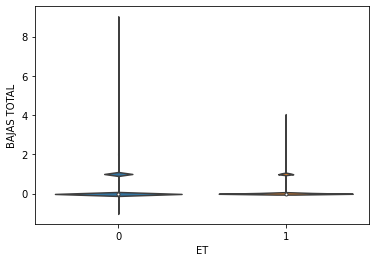

In [246]:
#data_causal['ET','BAJAS TOTAL']
sns.violinplot(data=data_causal, x="ET", y="BAJAS TOTAL")

<AxesSubplot:>

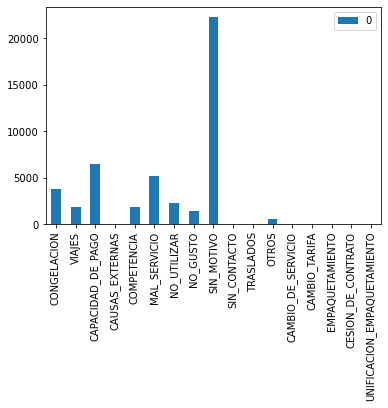

In [247]:
data_causal[data_causal['ET']==1][seleccionVariables].sum().to_frame().plot.bar()

<AxesSubplot:>

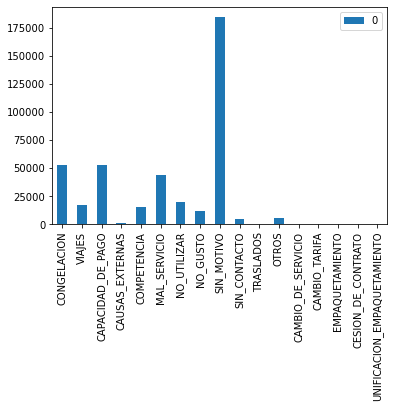

In [248]:
data_causal[data_causal['ET']==0][seleccionVariables].sum().to_frame().plot.bar()

In [249]:
resumen_causa=data_causal[seleccionVariables].sum().to_frame()
resumen_causa=resumen_causa.merge(data_causal[data_causal['ET']==1][seleccionVariables].sum().to_frame(), left_index=True,right_index=True, how='left')
resumen_causa=resumen_causa.merge(data_causal[data_causal['ET']==0][seleccionVariables].sum().to_frame(), left_index=True,right_index=True, how='left')
resumen_causa.columns=['total','critico','normal']
resumen_causa

,total,critico,normal
CONGELACION,56401,3853,52548
VIAJES,19505,1897,17608
CAPACIDAD_DE_PAGO,59308,6529,52779
CAUSAS_EXTERNAS,1582,0,1582
COMPETENCIA,17163,1852,15311
MAL_SERVICIO,49470,5232,44238
NO_UTILIZAR,22452,2271,20181
NO_GUSTO,12860,1391,11469
SIN_MOTIVO,206719,22288,184431
SIN_CONTACTO,4627,0,4627


In [250]:
x = resumen_causa.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
resumen_causa_nor = pd.DataFrame(x_scaled)
resumen_causa_nor.index=resumen_causa.index
resumen_causa_nor.columns=resumen_causa.columns
resumen_causa_nor=resumen_causa_nor.sort_values('total', ascending=True)
resumen_causa_nor

,total,critico,normal
EMPAQUETAMIENTO,0.000000,0.000000,0.000000
CESION_DE_CONTRATO,0.000000,0.000000,0.000000
TRASLADOS,0.000000,0.000000,0.000000
CAMBIO_DE_SERVICIO,0.000000,0.000000,0.000000
UNIFICACION_EMPAQUETAMIENTO,0.001084,0.000135,0.001198
CAMBIO_TARIFA,0.001301,0.000000,0.001459
CAUSAS_EXTERNAS,0.007653,0.000000,0.008578
SIN_CONTACTO,0.022383,0.000000,0.025088
OTROS,0.030413,0.025350,0.031025
NO_GUSTO,0.062210,0.062410,0.062186


<Figure size 432x288 with 0 Axes>

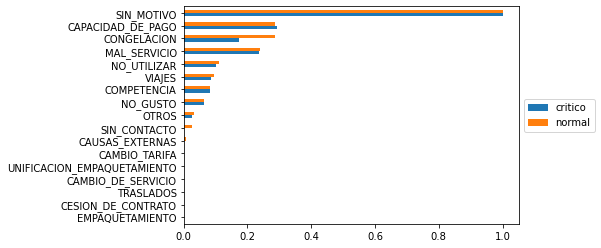

In [251]:
f = plt.figure()
resumen_causa_nor[['critico','normal']].plot.barh();
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [252]:
resumen_causa_nor['dif']=resumen_causa_nor['critico']-resumen_causa_nor['normal']

In [253]:
resumen_causa_nor=resumen_causa_nor.sort_values('dif', ascending=True)
resumen_causa_nor

,total,critico,normal,dif
CONGELACION,0.272839,0.172873,0.284920,-0.112046
SIN_CONTACTO,0.022383,0.000000,0.025088,-0.025088
VIAJES,0.094355,0.085113,0.095472,-0.010359
CAUSAS_EXTERNAS,0.007653,0.000000,0.008578,-0.008578
NO_UTILIZAR,0.108611,0.101893,0.109423,-0.007530
OTROS,0.030413,0.025350,0.031025,-0.005675
MAL_SERVICIO,0.239310,0.234745,0.239862,-0.005117
CAMBIO_TARIFA,0.001301,0.000000,0.001459,-0.001459
UNIFICACION_EMPAQUETAMIENTO,0.001084,0.000135,0.001198,-0.001064
EMPAQUETAMIENTO,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:>

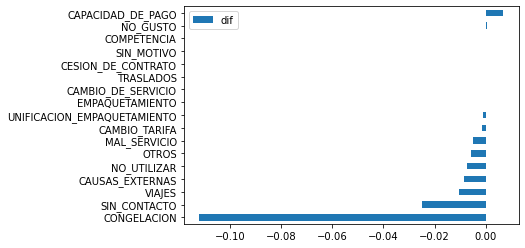

In [254]:
# Diferencia entre críticos y normales
resumen_causa_nor[['dif']].plot.barh()

## ARBOL

In [255]:
def visualizarArbol(model_fit,depth):
    fig, ax = plt.subplots(figsize=(depth*10,10))
    print(f"Profundidad del árbol: {tree_model.get_depth()}")
    print(f"Número de nodos terminales: {tree_model.get_n_leaves()}")
    plot = plot_tree(
                decision_tree = tree_model,
                feature_names = seleccionVariables,
                class_names   = ['normal','critico'],
                filled        = True,
                impurity      = False,
                fontsize      = 10,
                precision     = 3,
                ax            = ax
           )

Profundidad del árbol: 5
Número de nodos terminales: 7


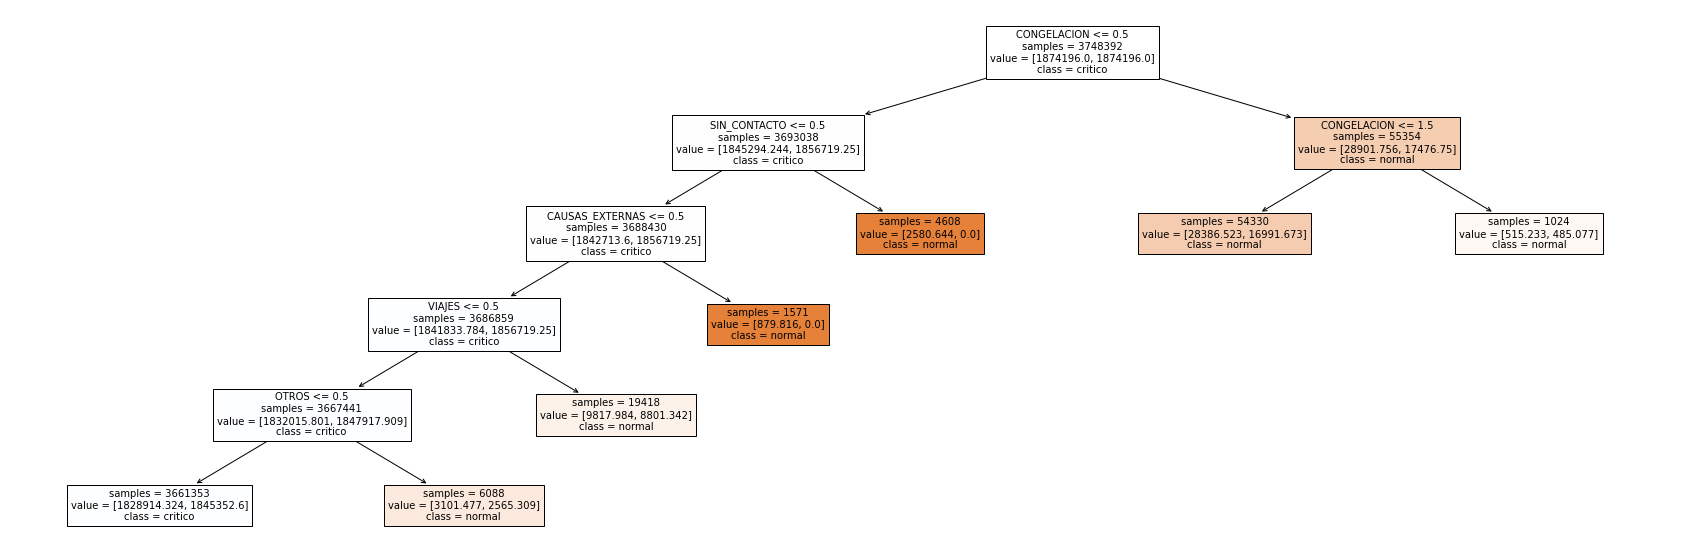

In [256]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5,min_samples_leaf=500, class_weight='balanced')
model_fit = tree_model.fit(X = data_causal[seleccionVariables], y = data_causal["ET"])
visualizarArbol(model_fit,3)

### Próximos pasos
* diferenciar entre voluntarios e involuntarios
* quitar variable blanco
* validar cambio tendencia ene-may

### Descripción Críticos

In [273]:
maestro_nodos=data_causal[['COD_NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO']].dropna().drop_duplicates()

In [274]:
len(maestro_nodos)

13687

In [275]:
maestro_nodos['COD_NODO'].value_counts()

3A3012    1
P1O       1
SES       1
PCM3B     1
F4M1      1
         ..
UAZ       1
VL11      1
CPQ       1
MTZ       1
IG7       1
Name: COD_NODO, Length: 13687, dtype: int64

In [276]:
maestro_nodos

,COD_NODO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO
0,ZG2,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN SUR,MEDELLIN,MEDELLIN SURORIENTAL
1,HBP1,REGION CENTRO,BOGOTA OCCIDENTE,SABANA OCCIDENTE,MADRID,MADRID
2,PPA4D,REGION COSTA,COSTA NORTE,CESAR,VALLEDUPAR,CESAR DISTRITO 1
3,9BZ,REGION CENTRO,BOGOTA SUR,BOSA,BOGOTA,ROMA
4,SNJ,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,BUCARAMANGA,DISTRITO BGA 1
...,...,...,...,...,...,...
3584383,LFD1,REGION ORIENTE,SANBOY,BOYACA,TUNJA,TUNJA SUR
3587577,14B13B,REGION CENTRO,BOGOTA SUR,ALSACIA,BOGOTA,CASTILLA
3641379,LBS1,REGION OCCIDENTE,CALI,CALI NORTE,CALI,CALI NORTE DISTRITO 2
3709544,QS23B,REGION CENTRO,BOGOTA ORIENTE,RESTREPO,BOGOTA,OLAYA


In [277]:
maestro_nodos[maestro_nodos['COD_NODO']=='LC33B']

,COD_NODO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO
1592,LC33B,REGION CENTRO,BOGOTA NORTE,SABANA NORTE,LA CALERA,TOCANCIPA


In [278]:
resumen_medida

FECHA,1,2,3,4,5,6,7,8,9,10,ene_oct,ene_may,bin_alfa
COD_NODO,,,,,,,,,,,,,
01S,NaN,NaN,0.875348,0.871263,1.209064,0.863952,0.860241,NaN,NaN,1.035875,NaN,NaN,NaN
02S,1.274914,0.907934,1.277684,1.258177,1.259581,1.270295,1.254361,0.909536,1.103387,0.957562,-0.317352,-0.015333,"(-0.43, -0.163]"
0AL,NaN,NaN,0.738222,NaN,0.728679,0.539047,0.760157,NaN,NaN,0.474946,NaN,NaN,NaN
0AO,0.810964,NaN,0.988197,1.077074,NaN,NaN,NaN,NaN,0.680075,NaN,NaN,NaN,NaN
0AR,1.284109,1.216581,1.298053,1.183848,1.104240,1.320534,1.172261,1.336661,1.033125,1.029064,-0.255045,-0.179869,"(-0.43, -0.163]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZUL,1.063994,NaN,1.671811,1.072029,1.091996,1.088498,1.090459,1.112140,1.159577,1.121575,0.057581,0.028003,"(-0.163, 0.104]"
ZVD,0.986515,0.960976,0.974316,0.979039,0.931441,0.957367,0.953681,0.961424,0.894125,0.844062,-0.142453,-0.055074,"(-0.163, 0.104]"
ZVG,1.172341,1.176593,1.132425,1.066752,1.174378,1.166202,1.072115,1.195050,1.040057,1.041562,-0.130779,0.002037,"(-0.163, 0.104]"


In [257]:
sel_var=['DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO']

In [279]:
resumen_medida_desc=resumen_medida.merge(maestro_nodos,left_index=True,right_on='COD_NODO',how='left')

In [281]:
resumen_medida_desc['ET']=np.where(resumen_medida_desc['ene_oct']<=corte,1,0)

In [282]:
resumen_medida_desc

,1,2,3,4,5,6,7,8,9,10,ene_oct,ene_may,bin_alfa,COD_NODO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO,ET
10702.0,NaN,NaN,0.875348,0.871263,1.209064,0.863952,0.860241,NaN,NaN,1.035875,NaN,NaN,NaN,01S,REGION CENTRO,BOGOTA NORTE,SUBA,BOGOTA,GAITANA,0
22605.0,1.274914,0.907934,1.277684,1.258177,1.259581,1.270295,1.254361,0.909536,1.103387,0.957562,-0.317352,-0.015333,"(-0.43, -0.163]",02S,REGION CENTRO,BOGOTA NORTE,SUBA,BOGOTA,GAITANA,1
11801.0,NaN,NaN,0.738222,NaN,0.728679,0.539047,0.760157,NaN,NaN,0.474946,NaN,NaN,NaN,0AL,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 2,0
289054.0,0.810964,NaN,0.988197,1.077074,NaN,NaN,NaN,NaN,0.680075,NaN,NaN,NaN,NaN,0AO,REGION ORIENTE,SANBOY,NORTE DE SANTANDER,CUCUTA,DISTRITO CUCUTA 2,0
150304.0,1.284109,1.216581,1.298053,1.183848,1.104240,1.320534,1.172261,1.336661,1.033125,1.029064,-0.255045,-0.179869,"(-0.43, -0.163]",0AR,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN NORTE,MEDELLIN,MEDELLIN NORORIENTAL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369575.0,1.063994,NaN,1.671811,1.072029,1.091996,1.088498,1.090459,1.112140,1.159577,1.121575,0.057581,0.028003,"(-0.163, 0.104]",ZUL,REGION NOROCCIDENTE,EJE CAFETERO,CALDAS,MANIZALES,MANIZALES CALDAS6,0
188327.0,0.986515,0.960976,0.974316,0.979039,0.931441,0.957367,0.953681,0.961424,0.894125,0.844062,-0.142453,-0.055074,"(-0.163, 0.104]",ZVD,REGION OCCIDENTE,CALI,CALI NORTE,CALI,CALI NORTE DISTRITO 2,0
389378.0,1.172341,1.176593,1.132425,1.066752,1.174378,1.166202,1.072115,1.195050,1.040057,1.041562,-0.130779,0.002037,"(-0.163, 0.104]",ZVG,REGION OCCIDENTE,CALI,CALI SUR,CALI,CALI SUR DISTRITO 2,0
216450.0,0.959760,1.121800,1.156596,1.157604,1.087080,1.102153,1.101199,1.179469,1.024236,0.952015,-0.007745,0.127320,"(-0.163, 0.104]",ZVS,REGION OCCIDENTE,CALI,CALI SUR,CALI,CALI SUR DISTRITO 2,0


<AxesSubplot:xlabel='DIVISION'>

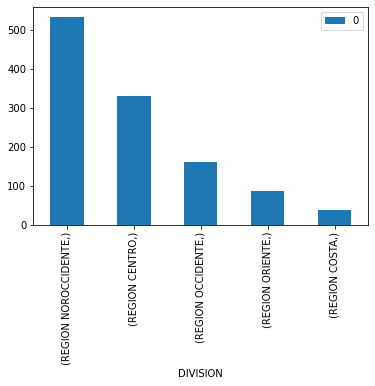

In [289]:
resumen_medida_desc[resumen_medida_desc['ET']==1][['DIVISION']].value_counts().to_frame().plot.bar()

<AxesSubplot:xlabel='ZONA'>

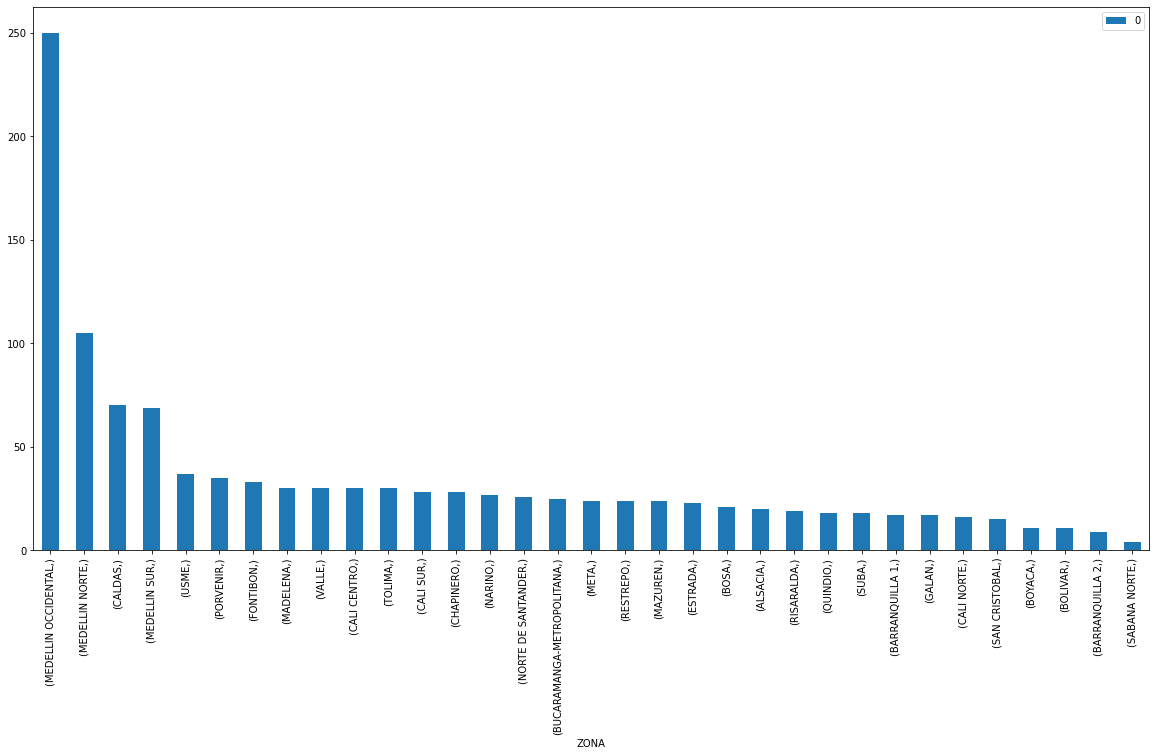

In [294]:
resumen_medida_desc[resumen_medida_desc['ET']==1][['ZONA']].value_counts().to_frame().plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='CIUDAD'>

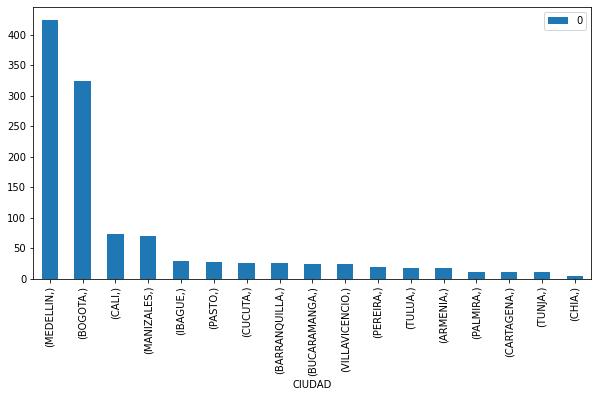

In [313]:
resumen_medida_desc[resumen_medida_desc['ET']==1][['CIUDAD']].value_counts().to_frame().plot.bar(figsize=(10,5))

In [316]:
resumen_medida_desc_rel=pd.crosstab(index=resumen_medida_desc['CIUDAD'],
            columns=resumen_medida_desc['ET'], margins=True, normalize='index')

<AxesSubplot:xlabel='CIUDAD'>

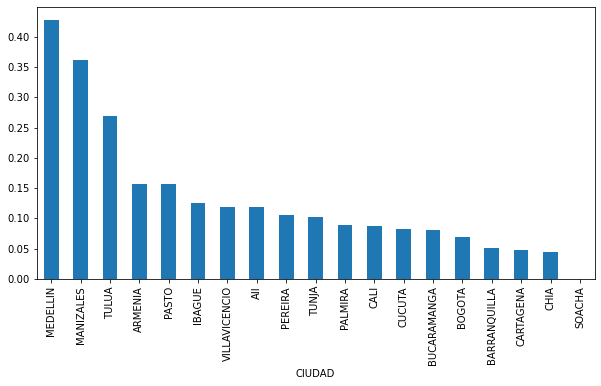

In [317]:
resumen_medida_desc_rel[1].sort_values(ascending=False).plot.bar(figsize=(10,5))

In [309]:
resumen_medida_desc_rel=pd.crosstab(index=resumen_medida_desc['ZONA'],
            columns=resumen_medida_desc['ET'], margins=True, normalize='index')

<AxesSubplot:xlabel='CIUDAD'>

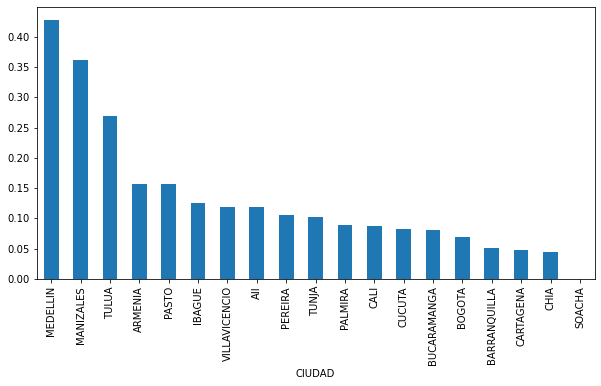

In [318]:
resumen_medida_desc_rel[1].sort_values(ascending=False).plot.bar(figsize=(10,5))

In [320]:
resumen_medida_desc_rel[1].sort_values(ascending=False)

CIUDAD
MEDELLIN         0.427851
MANIZALES        0.360825
TULUA            0.268657
ARMENIA          0.156522
PASTO            0.156069
IBAGUE           0.124481
VILLAVICENCIO    0.118227
All              0.117987
PEREIRA          0.104972
TUNJA            0.101852
PALMIRA          0.089552
CALI             0.086449
CUCUTA           0.083067
BUCARAMANGA      0.080128
BOGOTA           0.069002
BARRANQUILLA     0.050485
CARTAGENA        0.047619
CHIA             0.043478
SOACHA           0.000000
Name: 1, dtype: float64

In [322]:
pd.crosstab(index=resumen_medida_desc['CIUDAD'],
            columns=resumen_medida_desc['ET'], margins=True).sort_values(1,ascending=False)

ET,0,1,All
CIUDAD,,,
All,8552,1144,9696
MEDELLIN,567,424,991
BOGOTA,4385,325,4710
CALI,782,74,856
MANIZALES,124,70,194
IBAGUE,211,30,241
PASTO,146,27,173
CUCUTA,287,26,313
BARRANQUILLA,489,26,515


In [323]:
resumen_medida_desc.to_csv('nodos_criticos_tarifas.csv',index=False)

### Voluntario

In [78]:
data=data[data['INVOLUNTARIO']==0]

In [79]:
seleccion_variables=['COD_NODO','FECHA','INVOLUNTARIO','CD_BLANCOS_CAMBIOS_SERVICIO','AVG_TARIFA_TIGO','AVG_TARIFA_ETB','AVG_TARIFA_MOVISTAR','PROM_RENTA']
# no hay precio mega Movistart

In [80]:
data[seleccion_variables].isnull().sum()

COD_NODO                             0
FECHA                                0
INVOLUNTARIO                         0
CD_BLANCOS_CAMBIOS_SERVICIO          0
AVG_TARIFA_TIGO                1362579
AVG_TARIFA_ETB                 2624365
AVG_TARIFA_MOVISTAR            1514298
PROM_RENTA                       15507
dtype: int64

In [81]:
data[seleccion_variables].isnull().sum()/len(data)

COD_NODO                       0.000000
FECHA                          0.000000
INVOLUNTARIO                   0.000000
CD_BLANCOS_CAMBIOS_SERVICIO    0.000000
AVG_TARIFA_TIGO                0.421279
AVG_TARIFA_ETB                 0.811396
AVG_TARIFA_MOVISTAR            0.468188
PROM_RENTA                     0.004794
dtype: float64

In [82]:
data[seleccion_variables].describe()

,FECHA,INVOLUNTARIO,CD_BLANCOS_CAMBIOS_SERVICIO,AVG_TARIFA_TIGO,AVG_TARIFA_ETB,AVG_TARIFA_MOVISTAR,PROM_RENTA
count,3.234383e+06,3234383.0,3234383.0,1.871804e+06,610018.000000,1.720085e+06,3.218876e+06
mean,6.073886e+00,0.0,0.0,1.244205e+05,92561.595422,1.036952e+05,1.028364e+05
std,2.803414e+00,0.0,0.0,1.254575e+04,19596.725265,9.651585e+03,1.751058e+04
min,1.000000e+00,0.0,0.0,7.199000e+04,79900.000000,7.199000e+04,1.134200e+04
25%,4.000000e+00,0.0,0.0,1.180000e+05,79900.000000,9.790000e+04,9.085100e+04
50%,6.000000e+00,0.0,0.0,1.267850e+05,79900.000000,1.054000e+05,1.025950e+05
75%,8.000000e+00,0.0,0.0,1.300000e+05,111525.000000,1.129000e+05,1.123210e+05
max,1.100000e+01,0.0,0.0,1.635700e+05,149900.000000,1.129000e+05,2.421450e+05


In [83]:
#alfa=com/nuestro

In [84]:
data_medida=data[seleccion_variables].copy()

In [85]:
variables_tarifa=['AVG_TARIFA_TIGO','AVG_TARIFA_ETB','AVG_TARIFA_MOVISTAR']

In [86]:
data_medida['comp_tarifa']=data_medida[variables_tarifa].min(axis=1)

In [87]:
data_medida['operador_menor_tarifa']=np.where(data_medida['comp_tarifa']==data_medida['AVG_TARIFA_TIGO'],'AVG_TARIFA_TIGO',
                                              np.where(data_medida['comp_tarifa']==data_medida['AVG_TARIFA_ETB'],'AVG_TARIFA_ETB',
                                                      np.where(data_medida['comp_tarifa']==data_medida['AVG_TARIFA_MOVISTAR'],'AVG_TARIFA_MOVISTAR','NINGUNO'
                                             )))

In [88]:
data_medida['ALFA_tarifa']=np.where(data_medida['operador_menor_tarifa']=='NINGUNO',np.nan,data_medida['comp_tarifa']/data_medida['PROM_RENTA'])

In [89]:
data_medida

,COD_NODO,FECHA,INVOLUNTARIO,CD_BLANCOS_CAMBIOS_SERVICIO,AVG_TARIFA_TIGO,AVG_TARIFA_ETB,AVG_TARIFA_MOVISTAR,PROM_RENTA,comp_tarifa,operador_menor_tarifa,ALFA_tarifa
0,ZG2,8,0,0,NaN,NaN,NaN,133632.0,NaN,NINGUNO,NaN
1,HBP1,3,0,0,NaN,NaN,NaN,107735.0,NaN,NINGUNO,NaN
2,PPA4D,3,0,0,NaN,NaN,NaN,102163.0,NaN,NINGUNO,NaN
3,9BZ,8,0,0,125714.285714,79900.0,108614.285714,89209.0,79900.000000,AVG_TARIFA_ETB,0.895650
4,SNJ,7,0,0,140000.000000,NaN,112900.000000,105915.0,112900.000000,AVG_TARIFA_MOVISTAR,1.065949
...,...,...,...,...,...,...,...,...,...,...,...
3748387,1GV,11,0,0,NaN,NaN,NaN,95346.0,NaN,NINGUNO,NaN
3748388,CVB,11,0,0,NaN,NaN,NaN,126325.0,NaN,NINGUNO,NaN
3748389,BTC,6,0,0,126250.000000,79900.0,109150.000000,92790.0,79900.000000,AVG_TARIFA_ETB,0.861084
3748390,P04,9,0,0,135523.333333,NaN,90656.666667,103679.0,90656.666667,AVG_TARIFA_MOVISTAR,0.874398


In [90]:
resumen_medida=pd.pivot_table(data_medida[['FECHA','COD_NODO','ALFA_tarifa']], columns='FECHA', index='COD_NODO',aggfunc=np.mean)
resumen_medida.columns = resumen_medida.columns.droplevel()
resumen_medida

FECHA,1,2,3,4,5,6,7,8,9,10
COD_NODO,,,,,,,,,,
01S,NaN,NaN,0.875348,0.871263,1.209064,0.863952,0.860241,NaN,NaN,1.035875
02S,1.274914,0.907934,1.277684,1.258177,1.259581,1.270295,1.254361,0.909536,1.103387,0.957562
0AL,NaN,NaN,0.738222,NaN,0.728679,0.539047,0.760157,NaN,NaN,0.474946
0AO,0.810964,NaN,0.988197,1.077074,NaN,NaN,NaN,NaN,0.680075,NaN
0AR,1.284109,1.216581,1.298053,1.183848,1.104240,1.320534,1.172261,1.336661,1.033125,1.029064
...,...,...,...,...,...,...,...,...,...,...
ZUL,1.063994,NaN,1.671811,1.072029,1.091996,1.088498,1.090459,1.112140,1.159577,1.121575
ZVD,0.986515,0.960976,0.974316,0.979039,0.931441,0.957367,0.953681,0.961424,0.894125,0.844062
ZVG,1.172341,1.176593,1.132425,1.066752,1.174378,1.166202,1.072115,1.195050,1.040057,1.041562


In [91]:
data_medida[data_medida['COD_NODO']=='01S'].sort_values('FECHA')

,COD_NODO,FECHA,INVOLUNTARIO,CD_BLANCOS_CAMBIOS_SERVICIO,AVG_TARIFA_TIGO,AVG_TARIFA_ETB,AVG_TARIFA_MOVISTAR,PROM_RENTA,comp_tarifa,operador_menor_tarifa,ALFA_tarifa
958918,01S,1,0,0,NaN,NaN,NaN,89601.0,NaN,NINGUNO,NaN
952438,01S,1,0,0,NaN,NaN,NaN,89601.0,NaN,NINGUNO,NaN
955462,01S,1,0,0,NaN,NaN,NaN,89601.0,NaN,NINGUNO,NaN
955750,01S,1,0,0,NaN,NaN,NaN,89601.0,NaN,NINGUNO,NaN
932134,01S,1,0,0,NaN,NaN,NaN,89601.0,NaN,NINGUNO,NaN
...,...,...,...,...,...,...,...,...,...,...,...
955892,01S,11,0,0,NaN,NaN,NaN,90819.0,NaN,NINGUNO,NaN
956036,01S,11,0,0,NaN,NaN,NaN,90819.0,NaN,NINGUNO,NaN
960932,01S,11,0,0,NaN,NaN,NaN,90819.0,NaN,NINGUNO,NaN
923636,01S,11,0,0,NaN,NaN,NaN,90819.0,NaN,NINGUNO,NaN


In [92]:
resumen_medida.isnull().sum()

FECHA
1     2963
2     3006
3     2811
4     2640
5     2765
6     2574
7     2342
8     2387
9     2071
10    2184
dtype: int64

In [93]:
resumen_medida.isnull().sum()/len(resumen_medida)

FECHA
1     0.305338
2     0.309769
3     0.289674
4     0.272053
5     0.284934
6     0.265251
7     0.241344
8     0.245981
9     0.213417
10    0.225062
dtype: float64

<AxesSubplot:xlabel='FECHA'>

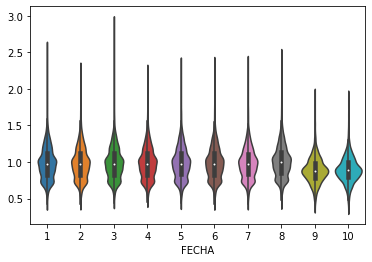

In [94]:
sns.violinplot(data=resumen_medida)

In [95]:
resumen_medida['ene_oct']=resumen_medida[10]-resumen_medida[1]
resumen_medida['ene_may']=resumen_medida[5]-resumen_medida[1]

In [96]:
resumen_medida.describe()

FECHA,1,2,3,4,5,6,7,8,9,10,ene_oct,ene_may
count,6741.000000,6698.000000,6893.000000,7064.000000,6939.000000,7130.000000,7362.000000,7317.000000,7633.000000,7520.000000,5716.000000,5517.000000
mean,0.986862,0.986459,0.986282,0.985155,0.989091,0.985250,0.981769,1.007998,0.889634,0.896711,-0.096479,-0.007082
std,0.222228,0.219783,0.218010,0.216290,0.218906,0.217622,0.211938,0.214597,0.172056,0.169812,0.170847,0.177239
min,0.424251,0.427115,0.443353,0.459624,0.432857,0.421675,0.423495,0.432636,0.367525,0.346936,-0.964745,-1.020891
25%,0.824723,0.824866,0.828721,0.824852,0.829139,0.826536,0.830247,0.854087,0.782884,0.790784,-0.199995,-0.061030
50%,0.976559,0.974808,0.974402,0.976436,0.977812,0.973474,0.973728,0.998418,0.880032,0.887337,-0.111612,0.000709
75%,1.127861,1.122591,1.120084,1.120176,1.123003,1.117394,1.111162,1.135050,0.991742,0.997354,0.015904,0.047504
max,2.567901,2.282624,2.918921,2.256057,2.353665,2.362262,2.378556,2.472470,1.943738,1.918936,0.371453,0.670422


<AxesSubplot:xlabel='FECHA'>

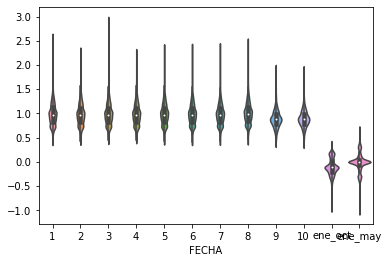

In [97]:
sns.violinplot(data=resumen_medida)

In [98]:
resumen_medida

FECHA,1,2,3,4,5,6,7,8,9,10,ene_oct,ene_may
COD_NODO,,,,,,,,,,,,
01S,NaN,NaN,0.875348,0.871263,1.209064,0.863952,0.860241,NaN,NaN,1.035875,NaN,NaN
02S,1.274914,0.907934,1.277684,1.258177,1.259581,1.270295,1.254361,0.909536,1.103387,0.957562,-0.317352,-0.015333
0AL,NaN,NaN,0.738222,NaN,0.728679,0.539047,0.760157,NaN,NaN,0.474946,NaN,NaN
0AO,0.810964,NaN,0.988197,1.077074,NaN,NaN,NaN,NaN,0.680075,NaN,NaN,NaN
0AR,1.284109,1.216581,1.298053,1.183848,1.104240,1.320534,1.172261,1.336661,1.033125,1.029064,-0.255045,-0.179869
...,...,...,...,...,...,...,...,...,...,...,...,...
ZUL,1.063994,NaN,1.671811,1.072029,1.091996,1.088498,1.090459,1.112140,1.159577,1.121575,0.057581,0.028003
ZVD,0.986515,0.960976,0.974316,0.979039,0.931441,0.957367,0.953681,0.961424,0.894125,0.844062,-0.142453,-0.055074
ZVG,1.172341,1.176593,1.132425,1.066752,1.174378,1.166202,1.072115,1.195050,1.040057,1.041562,-0.130779,0.002037


In [99]:
resumen_medida.isnull().sum()

FECHA
1          2963
2          3006
3          2811
4          2640
5          2765
6          2574
7          2342
8          2387
9          2071
10         2184
ene_oct    3988
ene_may    4187
dtype: int64

In [100]:
resumen_medida.isnull().sum()/len(resumen_medida)

FECHA
1          0.305338
2          0.309769
3          0.289674
4          0.272053
5          0.284934
6          0.265251
7          0.241344
8          0.245981
9          0.213417
10         0.225062
ene_oct    0.410965
ene_may    0.431472
dtype: float64

In [101]:
resumen_medida['bin_alfa']=pd.cut((resumen_medida['ene_oct']),bins=5,right=True)

In [102]:
resumen_medida['bin_alfa'].value_counts().to_frame().sort_index()

,bin_alfa
"(-0.966, -0.698]",5
"(-0.698, -0.43]",119
"(-0.43, -0.163]",1772
"(-0.163, 0.104]",2823
"(0.104, 0.371]",997


## opcion2

In [103]:
resumen_medida['ene_oct'].quantile(0.05)

-0.35964126925660145

In [104]:
corte=resumen_medida['ene_oct'].quantile(0.20)
corte

-0.23248164336784172

###  Segunda parte

In [105]:
seleccionVariables=['CONGELACION','VIAJES','CAPACIDAD_DE_PAGO','CAUSAS_EXTERNAS','COMPETENCIA','MAL_SERVICIO','NO_UTILIZAR',
                    'NO_GUSTO','SIN_MOTIVO','SIN_CONTACTO','TRASLADOS','OTROS','CAMBIO_DE_SERVICIO','CAMBIO_TARIFA','EMPAQUETAMIENTO',
                    'CESION_DE_CONTRATO','UNIFICACION_EMPAQUETAMIENTO']

# Sin 'CD_BLANCOS_CAMBIOS_OTROS'

### Pregunta
* tome la diferencia de enero a oct.  Debo tomar el cambio de tendencia?

In [106]:
data_causal=data.merge(resumen_medida[['ene_oct']], left_on='COD_NODO', right_index=True, how='left')

In [107]:
data_causal['ET']=np.where(data_causal['ene_oct']<=corte,1,0)

In [108]:
data_causal['ET'].value_counts()

0    2891534
1     342849
Name: ET, dtype: int64

In [109]:
data_causal['ET'].value_counts()/len(data_causal)

0    0.893999
1    0.106001
Name: ET, dtype: float64

## Fase 2
* Caracterizar Casos Graves
* Arboles

In [110]:
data_causal

,CUENTA,COD_SERVICIO,Velocidad,Internet,COD_NODO,ESTRATO,CARTERA,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,...,MEGA,NIVEL_ALARMA_MALO,NIVEL_ALARMA_BUENO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO,ene_oct,ET
0,88384766,NB2,@,50,ZG2,3,0,0,0,0,...,0.714482,0.0,2.0,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN SUR,MEDELLIN,MEDELLIN SURORIENTAL,NaN,0
1,92228220,DV3,NaN,60,HBP1,3,0,0,0,0,...,0.414081,0.0,0.0,REGION CENTRO,BOGOTA OCCIDENTE,SABANA OCCIDENTE,MADRID,MADRID,NaN,0
2,48074413,5BA,NaN,5,PPA4D,3,0,0,0,0,...,2.877093,0.0,0.0,REGION COSTA,COSTA NORTE,CESAR,VALLEDUPAR,CESAR DISTRITO 1,NaN,0
3,2139171,SUD,@,10,9BZ,2,0,0,0,0,...,1.108223,0.0,3.0,REGION CENTRO,BOGOTA SUR,BOSA,BOGOTA,ROMA,-0.139428,0
4,14885225,D3V,@,160,SNJ,4,0,0,0,0,...,1.006936,0.0,0.0,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,BUCARAMANGA,DISTRITO BGA 1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748387,90354179,PH5,@,5,1GV,2,0,0,0,0,...,1.686854,0.0,2.0,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN NORTE,BELLO,BELLO NORTE,NaN,0
3748388,8087598,CMB,@,100,CVB,4,0,0,0,0,...,2.063867,0.0,2.0,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,FLORIDABLANCA,DISTRITO FLORIDA 1,NaN,0
3748389,71164933,R30,@,30,BTC,2,0,0,0,0,...,0.441224,0.0,0.0,REGION CENTRO,BOGOTA SUR,BOSA,BOGOTA,ROMA,0.160395,0
3748390,71189674,5BA,@,5,P04,4,0,0,0,0,...,1.873057,0.0,1.0,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,BUCARAMANGA,DISTRITO BGA 3,-0.078399,0


In [111]:
data_causal[seleccionVariables].describe()

,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,SIN_MOTIVO,SIN_CONTACTO,TRASLADOS,OTROS,CAMBIO_DE_SERVICIO,CAMBIO_TARIFA,EMPAQUETAMIENTO,CESION_DE_CONTRATO,UNIFICACION_EMPAQUETAMIENTO
count,3.234383e+06,3.234383e+06,3.234383e+06,3234383.0,3.234383e+06,3.234383e+06,3.234383e+06,3.234383e+06,3.234383e+06,3.234383e+06,3234383.0,3.234383e+06,3234383.0,3234383.0,3234383.0,3234383.0,3.234383e+06
mean,-1.197384e-02,-5.859232e-03,-1.827458e-02,0.0,-5.306422e-03,-1.519826e-02,-6.437395e-03,-3.817111e-03,-6.382639e-02,-1.855068e-06,0.0,-1.775609e-03,0.0,0.0,0.0,0.0,-7.729449e-06
std,1.117349e-01,7.663235e-02,1.349522e-01,0.0,7.302097e-02,1.230665e-01,8.042192e-02,6.222874e-02,2.462706e-01,1.362008e-03,0.0,4.340232e-02,0.0,0.0,0.0,0.0,2.780178e-03
min,-4.000000e+00,-4.000000e+00,-4.000000e+00,0.0,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-6.000000e+00,-1.000000e+00,0.0,-3.000000e+00,0.0,0.0,0.0,0.0,-1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
max,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00


In [112]:
data_causal[seleccionVariables]=data_causal[seleccionVariables]*-1

In [113]:
data_causal['BAJAS TOTAL']=data_causal[seleccionVariables].sum(axis=1)

<AxesSubplot:xlabel='ET', ylabel='BAJAS TOTAL'>

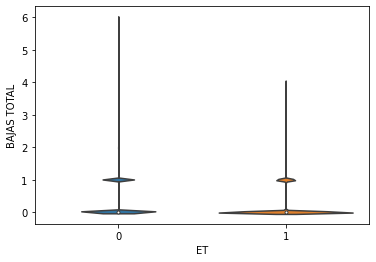

In [114]:
#data_causal['ET','BAJAS TOTAL']
sns.violinplot(data=data_causal, x="ET", y="BAJAS TOTAL")

<AxesSubplot:>

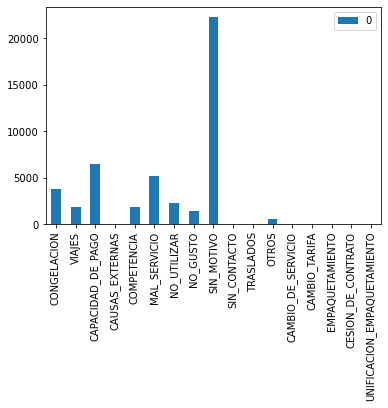

In [115]:
data_causal[data_causal['ET']==1][seleccionVariables].sum().to_frame().plot.bar()

<AxesSubplot:>

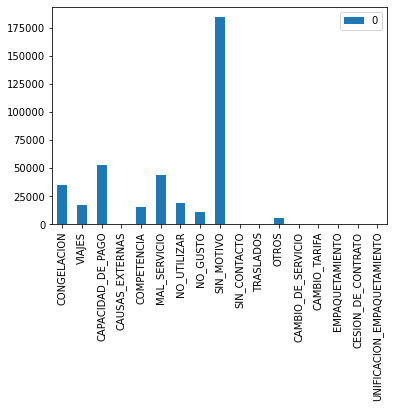

In [116]:
data_causal[data_causal['ET']==0][seleccionVariables].sum().to_frame().plot.bar()

In [117]:
resumen_causa=data_causal[seleccionVariables].sum().to_frame()
resumen_causa=resumen_causa.merge(data_causal[data_causal['ET']==1][seleccionVariables].sum().to_frame(), left_index=True,right_index=True, how='left')
resumen_causa=resumen_causa.merge(data_causal[data_causal['ET']==0][seleccionVariables].sum().to_frame(), left_index=True,right_index=True, how='left')
resumen_causa.columns=['total','critico','normal']
resumen_causa

,total,critico,normal
CONGELACION,38728,3853,34875
VIAJES,18951,1897,17054
CAPACIDAD_DE_PAGO,59107,6529,52578
CAUSAS_EXTERNAS,0,0,0
COMPETENCIA,17163,1852,15311
MAL_SERVICIO,49157,5232,43925
NO_UTILIZAR,20821,2271,18550
NO_GUSTO,12346,1391,10955
SIN_MOTIVO,206439,22288,184151
SIN_CONTACTO,6,0,6


In [118]:
x = resumen_causa.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
resumen_causa_nor = pd.DataFrame(x_scaled)
resumen_causa_nor.index=resumen_causa.index
resumen_causa_nor.columns=resumen_causa.columns
resumen_causa_nor=resumen_causa_nor.sort_values('total', ascending=True)
resumen_causa_nor

,total,critico,normal
EMPAQUETAMIENTO,0.000000,0.000000,0.000000
CAUSAS_EXTERNAS,0.000000,0.000000,0.000000
CAMBIO_TARIFA,0.000000,0.000000,0.000000
CESION_DE_CONTRATO,0.000000,0.000000,0.000000
TRASLADOS,0.000000,0.000000,0.000000
CAMBIO_DE_SERVICIO,0.000000,0.000000,0.000000
SIN_CONTACTO,0.000029,0.000000,0.000033
UNIFICACION_EMPAQUETAMIENTO,0.000121,0.000135,0.000119
OTROS,0.027819,0.025350,0.028118
NO_GUSTO,0.059805,0.062410,0.059489


<Figure size 432x288 with 0 Axes>

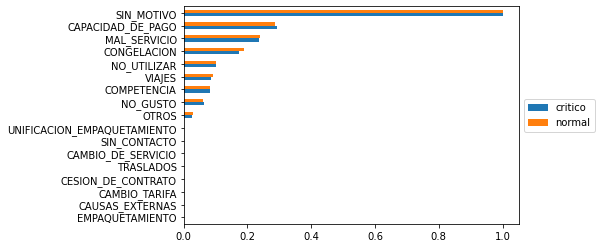

In [119]:
f = plt.figure()
resumen_causa_nor[['critico','normal']].plot.barh();
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [120]:
resumen_causa_nor['dif']=resumen_causa_nor['critico']-resumen_causa_nor['normal']

In [121]:
resumen_causa_nor=resumen_causa_nor.sort_values('dif', ascending=False)
resumen_causa_nor

,total,critico,normal,dif
CAPACIDAD_DE_PAGO,0.286317,0.292938,0.285516,0.007422
NO_GUSTO,0.059805,0.062410,0.059489,0.002921
NO_UTILIZAR,0.100858,0.101893,0.100733,0.001161
UNIFICACION_EMPAQUETAMIENTO,0.000121,0.000135,0.000119,0.000015
EMPAQUETAMIENTO,0.000000,0.000000,0.000000,0.000000
CAUSAS_EXTERNAS,0.000000,0.000000,0.000000,0.000000
SIN_MOTIVO,1.000000,1.000000,1.000000,0.000000
CAMBIO_DE_SERVICIO,0.000000,0.000000,0.000000,0.000000
TRASLADOS,0.000000,0.000000,0.000000,0.000000
CESION_DE_CONTRATO,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:>

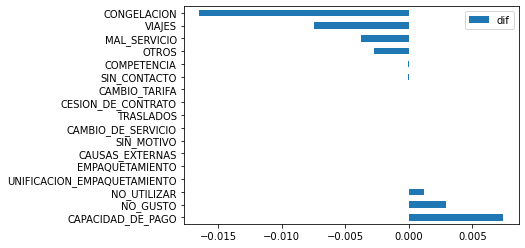

In [122]:
# Diferencia entre críticos y normales
resumen_causa_nor[['dif']].plot.barh()

## ARBOL

In [123]:
def visualizarArbol(model_fit,depth):
    fig, ax = plt.subplots(figsize=(depth*10,10))
    print(f"Profundidad del árbol: {tree_model.get_depth()}")
    print(f"Número de nodos terminales: {tree_model.get_n_leaves()}")
    plot = plot_tree(
                decision_tree = tree_model,
                feature_names = seleccionVariables,
                class_names   = ['normal','critico'],
                filled        = True,
                impurity      = False,
                fontsize      = 10,
                precision     = 3,
                ax            = ax
           )

Profundidad del árbol: 5
Número de nodos terminales: 8


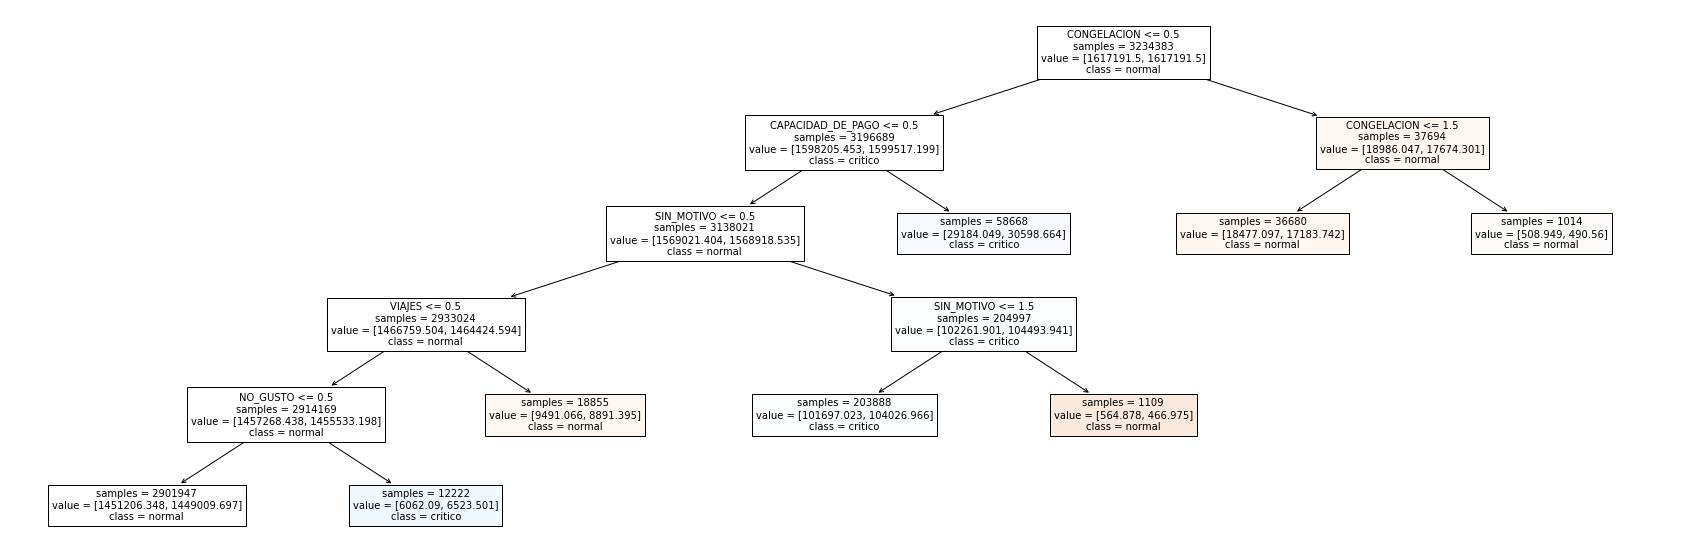

In [124]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5,min_samples_leaf=500, class_weight='balanced')
model_fit = tree_model.fit(X = data_causal[seleccionVariables], y = data_causal["ET"])
visualizarArbol(model_fit,3)

## INVOLUNTARIOS

In [125]:
data=data_total[data_total['INVOLUNTARIO']==-1]

In [126]:
seleccion_variables=['COD_NODO','FECHA','INVOLUNTARIO','CD_BLANCOS_CAMBIOS_SERVICIO','AVG_TARIFA_TIGO','AVG_TARIFA_ETB','AVG_TARIFA_MOVISTAR','PROM_RENTA']
# no hay precio mega Movistart

In [127]:
data[seleccion_variables].isnull().sum()

COD_NODO                            0
FECHA                               0
INVOLUNTARIO                        0
CD_BLANCOS_CAMBIOS_SERVICIO         0
AVG_TARIFA_TIGO                265783
AVG_TARIFA_ETB                 432261
AVG_TARIFA_MOVISTAR            291345
PROM_RENTA                      41354
dtype: int64

In [128]:
data[seleccion_variables].isnull().sum()/len(data)

COD_NODO                       0.000000
FECHA                          0.000000
INVOLUNTARIO                   0.000000
CD_BLANCOS_CAMBIOS_SERVICIO    0.000000
AVG_TARIFA_TIGO                0.517078
AVG_TARIFA_ETB                 0.840960
AVG_TARIFA_MOVISTAR            0.566809
PROM_RENTA                     0.080454
dtype: float64

In [129]:
data[seleccion_variables].describe()

,FECHA,INVOLUNTARIO,CD_BLANCOS_CAMBIOS_SERVICIO,AVG_TARIFA_TIGO,AVG_TARIFA_ETB,AVG_TARIFA_MOVISTAR,PROM_RENTA
count,514009.000000,514009.0,514009.0,248226.000000,81748.000000,222664.000000,472655.000000
mean,6.223449,-1.0,0.0,120986.114649,95812.646018,102185.801468,94505.438578
std,3.295587,0.0,0.0,14057.918865,20415.262806,10002.996185,14781.706660
min,1.000000,-1.0,0.0,71990.000000,79900.000000,71990.000000,11342.000000
25%,3.000000,-1.0,0.0,112000.000000,79900.000000,96878.888889,85490.000000
50%,6.000000,-1.0,0.0,124000.000000,79900.000000,102900.000000,93641.000000
75%,9.000000,-1.0,0.0,130000.000000,117400.000000,112900.000000,104594.000000
max,11.000000,-1.0,0.0,163570.000000,149900.000000,112900.000000,231390.000000


In [130]:
#alfa=com/nuestro

In [131]:
data_medida=data[seleccion_variables].copy()

In [132]:
variables_tarifa=['AVG_TARIFA_TIGO','AVG_TARIFA_ETB','AVG_TARIFA_MOVISTAR']

In [133]:
data_medida['comp_tarifa']=data_medida[variables_tarifa].min(axis=1)

In [134]:
data_medida['operador_menor_tarifa']=np.where(data_medida['comp_tarifa']==data_medida['AVG_TARIFA_TIGO'],'AVG_TARIFA_TIGO',
                                              np.where(data_medida['comp_tarifa']==data_medida['AVG_TARIFA_ETB'],'AVG_TARIFA_ETB',
                                                      np.where(data_medida['comp_tarifa']==data_medida['AVG_TARIFA_MOVISTAR'],'AVG_TARIFA_MOVISTAR','NINGUNO'
                                             )))

In [135]:
data_medida['ALFA_tarifa']=np.where(data_medida['operador_menor_tarifa']=='NINGUNO',np.nan,data_medida['comp_tarifa']/data_medida['PROM_RENTA'])

In [136]:
data_medida

,COD_NODO,FECHA,INVOLUNTARIO,CD_BLANCOS_CAMBIOS_SERVICIO,AVG_TARIFA_TIGO,AVG_TARIFA_ETB,AVG_TARIFA_MOVISTAR,PROM_RENTA,comp_tarifa,operador_menor_tarifa,ALFA_tarifa
9,UD4,11,-1,0,NaN,NaN,NaN,94282.0,NaN,NINGUNO,NaN
24,LOM1,2,-1,0,130000.000000,NaN,112900.000000,89010.0,112900.000000,AVG_TARIFA_MOVISTAR,1.268397
28,GIT,4,-1,0,117142.857143,NaN,100042.857143,80274.0,100042.857143,AVG_TARIFA_MOVISTAR,1.246267
32,BAB,1,-1,0,115000.000000,79900.0,97900.000000,108907.0,79900.000000,AVG_TARIFA_ETB,0.733653
53,IEL,11,-1,0,NaN,NaN,NaN,75574.0,NaN,NINGUNO,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3748338,1GV,11,-1,0,NaN,NaN,NaN,95346.0,NaN,NINGUNO,NaN
3748346,PAN,2,-1,0,100000.000000,NaN,82900.000000,109801.0,82900.000000,AVG_TARIFA_MOVISTAR,0.755002
3748353,GA5,5,-1,0,122500.000000,79900.0,105400.000000,108388.0,79900.000000,AVG_TARIFA_ETB,0.737166
3748359,SVI,2,-1,0,130000.000000,NaN,112900.000000,96159.0,112900.000000,AVG_TARIFA_MOVISTAR,1.174097


In [137]:
resumen_medida=pd.pivot_table(data_medida[['FECHA','COD_NODO','ALFA_tarifa']], columns='FECHA', index='COD_NODO',aggfunc=np.mean)
resumen_medida.columns = resumen_medida.columns.droplevel()
resumen_medida

FECHA,1,2,3,4,5,6,7,8,9,10
COD_NODO,,,,,,,,,,
01S,NaN,NaN,0.875348,0.871263,1.209064,0.863952,0.860241,NaN,NaN,1.035875
02S,1.274914,0.907934,1.277684,1.258177,1.259581,1.270295,1.254361,0.909536,1.103387,0.957562
0AL,NaN,NaN,NaN,NaN,0.728679,NaN,NaN,NaN,NaN,0.474946
0AO,NaN,NaN,NaN,1.077074,NaN,NaN,NaN,NaN,NaN,NaN
0AR,1.284109,1.216581,1.298053,1.183848,1.104240,1.320534,1.172261,NaN,1.033125,1.029064
...,...,...,...,...,...,...,...,...,...,...
ZUL,1.063994,NaN,1.671811,1.072029,1.091996,1.088498,1.090459,NaN,1.159577,1.121575
ZVD,0.986515,0.960976,0.974316,0.979039,0.931441,0.957367,0.953681,NaN,0.894125,0.844062
ZVG,1.172341,1.176593,1.132425,1.066752,1.174378,1.166202,1.072115,1.195050,1.040057,1.041562


In [138]:
data_medida[data_medida['COD_NODO']=='01S'].sort_values('FECHA')

,COD_NODO,FECHA,INVOLUNTARIO,CD_BLANCOS_CAMBIOS_SERVICIO,AVG_TARIFA_TIGO,AVG_TARIFA_ETB,AVG_TARIFA_MOVISTAR,PROM_RENTA,comp_tarifa,operador_menor_tarifa,ALFA_tarifa
959350,01S,1,-1,0,NaN,NaN,NaN,89601.0,NaN,NINGUNO,NaN
1020694,01S,1,-1,0,NaN,NaN,NaN,89601.0,NaN,NINGUNO,NaN
993910,01S,1,-1,0,NaN,NaN,NaN,89601.0,NaN,NINGUNO,NaN
925942,01S,1,-1,0,NaN,NaN,NaN,89601.0,NaN,NINGUNO,NaN
11134,01S,2,-1,0,NaN,NaN,NaN,90711.0,NaN,NINGUNO,NaN
...,...,...,...,...,...,...,...,...,...,...,...
941924,01S,11,-1,0,NaN,NaN,NaN,90819.0,NaN,NINGUNO,NaN
941492,01S,11,-1,0,NaN,NaN,NaN,90819.0,NaN,NINGUNO,NaN
935732,01S,11,-1,0,NaN,NaN,NaN,90819.0,NaN,NINGUNO,NaN
903764,01S,11,-1,0,NaN,NaN,NaN,90819.0,NaN,NINGUNO,NaN


In [139]:
resumen_medida.isnull().sum()

FECHA
1     3384
2     3689
3     3569
4     3443
5     3277
6     3359
7     3084
8     7173
9     2368
10    2673
dtype: int64

In [140]:
resumen_medida.isnull().sum()/len(resumen_medida)

FECHA
1     0.397837
2     0.433694
3     0.419586
4     0.404773
5     0.385257
6     0.394898
7     0.362568
8     0.843287
9     0.278392
10    0.314249
dtype: float64

<AxesSubplot:xlabel='FECHA'>

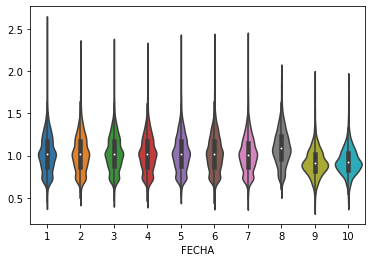

In [141]:
sns.violinplot(data=resumen_medida)

In [142]:
resumen_medida['ene_oct']=resumen_medida[10]-resumen_medida[1]
resumen_medida['ene_may']=resumen_medida[5]-resumen_medida[1]

In [143]:
resumen_medida.describe()

FECHA,1,2,3,4,5,6,7,8,9,10,ene_oct,ene_may
count,5122.000000,4817.000000,4937.000000,5063.000000,5229.000000,5147.000000,5422.000000,1333.000000,6138.000000,5833.000000,4127.000000,3987.000000
mean,1.025305,1.030343,1.031956,1.025179,1.029701,1.026143,1.018659,1.098351,0.921733,0.934736,-0.096583,-0.009041
std,0.223148,0.221337,0.217072,0.216118,0.218237,0.219871,0.212693,0.212232,0.164049,0.159878,0.179495,0.185980
min,0.450003,0.493676,0.475745,0.466443,0.515531,0.443615,0.435068,0.600706,0.367525,0.421670,-0.964745,-1.020891
25%,0.864059,0.869064,0.878699,0.869432,0.872566,0.862944,0.869966,0.958174,0.819999,0.833521,-0.206837,-0.059284
50%,1.014120,1.017209,1.020117,1.017530,1.018974,1.016341,1.008625,1.084405,0.906801,0.918679,-0.119835,0.000203
75%,1.174363,1.178140,1.177636,1.168661,1.171372,1.170336,1.153175,1.230987,1.020806,1.030562,0.036485,0.045928
max,2.567901,2.282624,2.302515,2.256057,2.353665,2.362262,2.378556,1.976976,1.943738,1.918936,0.371453,0.670422


<AxesSubplot:xlabel='FECHA'>

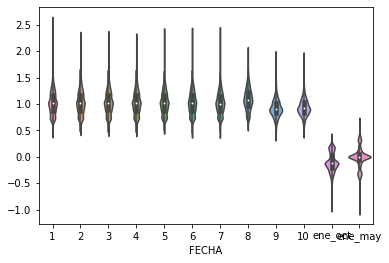

In [144]:
sns.violinplot(data=resumen_medida)

In [145]:
resumen_medida

FECHA,1,2,3,4,5,6,7,8,9,10,ene_oct,ene_may
COD_NODO,,,,,,,,,,,,
01S,NaN,NaN,0.875348,0.871263,1.209064,0.863952,0.860241,NaN,NaN,1.035875,NaN,NaN
02S,1.274914,0.907934,1.277684,1.258177,1.259581,1.270295,1.254361,0.909536,1.103387,0.957562,-0.317352,-0.015333
0AL,NaN,NaN,NaN,NaN,0.728679,NaN,NaN,NaN,NaN,0.474946,NaN,NaN
0AO,NaN,NaN,NaN,1.077074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0AR,1.284109,1.216581,1.298053,1.183848,1.104240,1.320534,1.172261,NaN,1.033125,1.029064,-0.255045,-0.179869
...,...,...,...,...,...,...,...,...,...,...,...,...
ZUL,1.063994,NaN,1.671811,1.072029,1.091996,1.088498,1.090459,NaN,1.159577,1.121575,0.057581,0.028003
ZVD,0.986515,0.960976,0.974316,0.979039,0.931441,0.957367,0.953681,NaN,0.894125,0.844062,-0.142453,-0.055074
ZVG,1.172341,1.176593,1.132425,1.066752,1.174378,1.166202,1.072115,1.195050,1.040057,1.041562,-0.130779,0.002037


In [146]:
resumen_medida.isnull().sum()

FECHA
1          3384
2          3689
3          3569
4          3443
5          3277
6          3359
7          3084
8          7173
9          2368
10         2673
ene_oct    4379
ene_may    4519
dtype: int64

In [147]:
resumen_medida.isnull().sum()/len(resumen_medida)

FECHA
1          0.397837
2          0.433694
3          0.419586
4          0.404773
5          0.385257
6          0.394898
7          0.362568
8          0.843287
9          0.278392
10         0.314249
ene_oct    0.514813
ene_may    0.531272
dtype: float64

In [148]:
resumen_medida['bin_alfa']=pd.cut((resumen_medida['ene_oct']),bins=5,right=True)

In [149]:
resumen_medida['bin_alfa'].value_counts().to_frame().sort_index()

,bin_alfa
"(-0.966, -0.698]",5
"(-0.698, -0.43]",96
"(-0.43, -0.163]",1362
"(-0.163, 0.104]",1866
"(0.104, 0.371]",798


## opcion2

In [150]:
resumen_medida['ene_oct'].quantile(0.05)

-0.36973423859158505

In [151]:
corte=resumen_medida['ene_oct'].quantile(0.20)
corte

-0.23872831347323645

###  Segunda parte

In [152]:
seleccionVariables=['CONGELACION','VIAJES','CAPACIDAD_DE_PAGO','CAUSAS_EXTERNAS','COMPETENCIA','MAL_SERVICIO','NO_UTILIZAR',
                    'NO_GUSTO','SIN_MOTIVO','SIN_CONTACTO','TRASLADOS','OTROS','CAMBIO_DE_SERVICIO','CAMBIO_TARIFA','EMPAQUETAMIENTO',
                    'CESION_DE_CONTRATO','UNIFICACION_EMPAQUETAMIENTO']

# Sin 'CD_BLANCOS_CAMBIOS_OTROS'

### Pregunta
* tome la diferencia de enero a oct.  Debo tomar el cambio de tendencia?

In [153]:
(data[seleccionVariables]==0).sum()

CONGELACION                    496343
VIAJES                         513464
CAPACIDAD_DE_PAGO              513808
CAUSAS_EXTERNAS                512436
COMPETENCIA                    514009
MAL_SERVICIO                   513697
NO_UTILIZAR                    512388
NO_GUSTO                       513497
SIN_MOTIVO                     513732
SIN_CONTACTO                   509407
TRASLADOS                      514009
OTROS                          513467
CAMBIO_DE_SERVICIO             514009
CAMBIO_TARIFA                  513760
EMPAQUETAMIENTO                514009
CESION_DE_CONTRATO             514009
UNIFICACION_EMPAQUETAMIENTO    513815
dtype: int64

In [154]:
data_causal=data.merge(resumen_medida[['ene_oct']], left_on='COD_NODO', right_index=True, how='left')

In [155]:
data_causal['ET']=np.where(data_causal['ene_oct']<=corte,1,0)

In [156]:
data_causal['ET'].value_counts()

0    460217
1     53792
Name: ET, dtype: int64

In [157]:
data_causal['ET'].value_counts()/len(data_causal)

0    0.895348
1    0.104652
Name: ET, dtype: float64

## Fase 2
* Caracterizar Casos Graves
* Arboles

In [158]:
data_causal

,CUENTA,COD_SERVICIO,Velocidad,Internet,COD_NODO,ESTRATO,CARTERA,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,...,MEGA,NIVEL_ALARMA_MALO,NIVEL_ALARMA_BUENO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO,ene_oct,ET
9,30223636,MH1,@,15,UD4,2,-1,0,0,0,...,0.576565,1.0,0.0,REGION COSTA,COSTA NORTE,BARRANQUILLA 1,BARRANQUILLA,BARRANQUILLA 1 DISTRITO 4,-0.247604,1
24,24894327,R30,@,30,LOM1,2,-1,0,0,0,...,0.872224,0.0,0.0,REGION ORIENTE,SANBOY,NORTE DE SANTANDER,CUCUTA,DISTRITO CUCUTA 4,-0.118797,0
28,36942049,RQM,@,15,GIT,1,-1,0,0,0,...,1.473971,0.0,0.0,REGION OCCIDENTE,TOLHUCA,TOLIMA,IBAGUE,TOLIMA DISTRITO 2,0.192738,0
32,28544974,BC7,@,75,BAB,3,-1,0,0,0,...,0.643162,0.0,0.0,REGION CENTRO,BOGOTA SUR,BOSA,BOGOTA,ROMA,0.186336,0
53,42058061,MH2,@,23,IEL,2,-1,0,0,0,...,0.054032,0.0,2.0,REGION ORIENTE,SANBOY,NORTE DE SANTANDER,CUCUTA,DISTRITO CUCUTA 4,-0.142559,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748338,70261516,NB2,@,50,1GV,2,-1,0,0,0,...,1.686854,0.0,2.0,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN NORTE,BELLO,BELLO NORTE,NaN,0
3748346,83007724,RB3,@,30,PAN,3,-1,0,0,0,...,1.752191,0.0,0.0,REGION OCCIDENTE,CALI,CALI SUR,CALI,CALI SUR DISTRITO 4,-0.079492,0
3748353,79554518,D3V,@,160,GA5,3,-1,0,0,0,...,NaN,0.0,0.0,REGION CENTRO,BOGOTA ORIENTE,GALAN,BOGOTA,AMERICAS,0.099258,0
3748359,25691003,PH5,@,5,SVI,2,-1,0,0,0,...,1.056041,0.0,0.0,REGION CENTRO,BOGOTA OCCIDENTE,FONTIBON,BOGOTA,ENGATIVA,NaN,0


In [159]:
data_causal[seleccionVariables].describe()

,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,SIN_MOTIVO,SIN_CONTACTO,TRASLADOS,OTROS,CAMBIO_DE_SERVICIO,CAMBIO_TARIFA,EMPAQUETAMIENTO,CESION_DE_CONTRATO,UNIFICACION_EMPAQUETAMIENTO
count,514009.000000,514009.000000,514009.000000,514009.000000,514009.0,514009.000000,514009.000000,514009.00000,514009.000000,514009.000000,514009.0,514009.000000,514009.0,514009.000000,514009.0,514009.0,514009.000000
mean,-0.034383,-0.001078,-0.000391,-0.003078,0.0,-0.000609,-0.003173,-0.00100,-0.000545,-0.008990,0.0,-0.001058,0.0,-0.000523,0.0,0.0,-0.000387
std,0.182807,0.033342,0.019771,0.055812,0.0,0.024748,0.056586,0.03173,0.023664,0.094842,0.0,0.032635,0.0,0.024671,0.0,0.0,0.020161
min,-9.000000,-2.000000,-1.000000,-4.000000,0.0,-2.000000,-2.000000,-2.00000,-3.000000,-4.000000,0.0,-2.000000,0.0,-3.000000,0.0,0.0,-2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
max,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000


In [160]:
data_causal[seleccionVariables]=data_causal[seleccionVariables]*-1

In [161]:
data_causal['BAJAS TOTAL']=data_causal[seleccionVariables].sum(axis=1)

<AxesSubplot:xlabel='ET', ylabel='BAJAS TOTAL'>

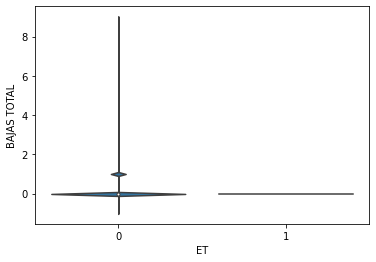

In [162]:
#data_causal['ET','BAJAS TOTAL']
sns.violinplot(data=data_causal, x="ET", y="BAJAS TOTAL")

In [163]:
data_causal[(data_causal['BAJAS TOTAL']>0)&(data_causal['ET']==1)]

,CUENTA,COD_SERVICIO,Velocidad,Internet,COD_NODO,ESTRATO,CARTERA,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,...,NIVEL_ALARMA_MALO,NIVEL_ALARMA_BUENO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO,ene_oct,ET,BAJAS TOTAL


In [164]:
data_causal[data_causal['ET']==1]

,CUENTA,COD_SERVICIO,Velocidad,Internet,COD_NODO,ESTRATO,CARTERA,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,...,NIVEL_ALARMA_MALO,NIVEL_ALARMA_BUENO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO,ene_oct,ET,BAJAS TOTAL
9,30223636,MH1,@,15,UD4,2,-1,0,0,0,...,1.0,0.0,REGION COSTA,COSTA NORTE,BARRANQUILLA 1,BARRANQUILLA,BARRANQUILLA 1 DISTRITO 4,-0.247604,1,0
110,13781839,R30,@,30,BE2,2,-1,0,0,0,...,0.0,0.0,REGION CENTRO,BOGOTA SUR,BOSA,BOGOTA,FERROCARRIL,-0.307819,1,0
119,39673336,TP3,@,30,LIL,2,-1,0,0,0,...,2.0,0.0,REGION OCCIDENTE,VACANA,VALLE,TULUA,VALLE DISTRITO 4,-0.247821,1,0
268,87301826,NB3,@,100,RV1,3,-1,0,0,0,...,0.0,5.0,REGION NOROCCIDENTE,EJE CAFETERO,CALDAS,MANIZALES,MANIZALES CALDAS4,-0.316593,1,0
364,82350257,BC7,@,75,I1S1,2,-1,0,0,0,...,0.0,0.0,REGION CENTRO,BOGOTA SUR,MADELENA,BOGOTA,ALEJANDRA,-0.263304,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746725,28180335,R75,@,75,JSO,3,-1,0,0,0,...,0.0,0.0,REGION ORIENTE,SANBOY,BOYACA,TUNJA,TUNJA SUR,-0.519051,1,0
3746919,21171406,NB3,@,100,PYR,3,-1,0,0,0,...,0.0,0.0,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN SUR,MEDELLIN,MEDELLIN SURORIENTAL,-0.247381,1,0
3747045,5632255,R1R,@,15,PYR,3,-1,0,0,0,...,0.0,0.0,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN SUR,MEDELLIN,MEDELLIN SURORIENTAL,-0.247381,1,0
3747519,25408119,D1V,@,60,PYR,3,-1,0,0,0,...,0.0,0.0,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN SUR,MEDELLIN,MEDELLIN SURORIENTAL,-0.247381,1,0


<AxesSubplot:>

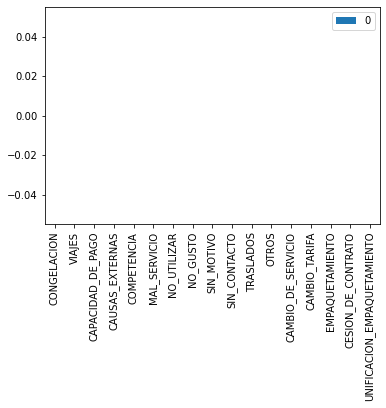

In [165]:
data_causal[data_causal['ET']==1][seleccionVariables].sum().to_frame().plot.bar()

<AxesSubplot:>

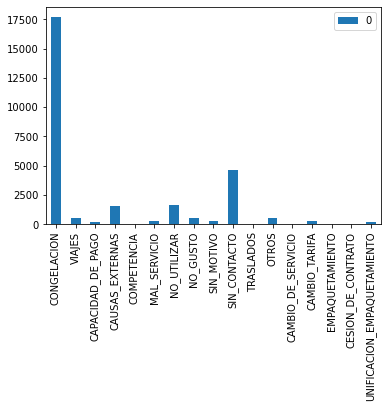

In [166]:
data_causal[data_causal['ET']==0][seleccionVariables].sum().to_frame().plot.bar()

In [167]:
resumen_causa=data_causal[seleccionVariables].sum().to_frame()
resumen_causa=resumen_causa.merge(data_causal[data_causal['ET']==1][seleccionVariables].sum().to_frame(), left_index=True,right_index=True, how='left')
resumen_causa=resumen_causa.merge(data_causal[data_causal['ET']==0][seleccionVariables].sum().to_frame(), left_index=True,right_index=True, how='left')
resumen_causa.columns=['total','critico','normal']
resumen_causa

,total,critico,normal
CONGELACION,17673,0,17673
VIAJES,554,0,554
CAPACIDAD_DE_PAGO,201,0,201
CAUSAS_EXTERNAS,1582,0,1582
COMPETENCIA,0,0,0
MAL_SERVICIO,313,0,313
NO_UTILIZAR,1631,0,1631
NO_GUSTO,514,0,514
SIN_MOTIVO,280,0,280
SIN_CONTACTO,4621,0,4621


In [168]:
x = resumen_causa.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
resumen_causa_nor = pd.DataFrame(x_scaled)
resumen_causa_nor.index=resumen_causa.index
resumen_causa_nor.columns=resumen_causa.columns
resumen_causa_nor=resumen_causa_nor.sort_values('total', ascending=False)
resumen_causa_nor

,total,critico,normal
CONGELACION,1.000000,0.0,1.000000
SIN_CONTACTO,0.261472,0.0,0.261472
NO_UTILIZAR,0.092288,0.0,0.092288
CAUSAS_EXTERNAS,0.089515,0.0,0.089515
VIAJES,0.031347,0.0,0.031347
OTROS,0.030781,0.0,0.030781
NO_GUSTO,0.029084,0.0,0.029084
MAL_SERVICIO,0.017711,0.0,0.017711
SIN_MOTIVO,0.015843,0.0,0.015843
CAMBIO_TARIFA,0.015221,0.0,0.015221


<Figure size 432x288 with 0 Axes>

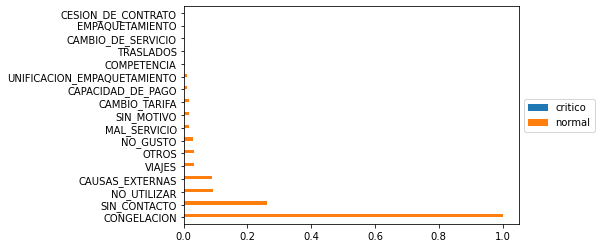

In [169]:
f = plt.figure()
resumen_causa_nor[['critico','normal']].plot.barh();
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [170]:
resumen_causa_nor['dif']=resumen_causa_nor['critico']-resumen_causa_nor['normal']

In [171]:
resumen_causa_nor=resumen_causa_nor.sort_values('dif', ascending=False)
resumen_causa_nor

,total,critico,normal,dif
CESION_DE_CONTRATO,0.000000,0.0,0.000000,0.000000
EMPAQUETAMIENTO,0.000000,0.0,0.000000,0.000000
CAMBIO_DE_SERVICIO,0.000000,0.0,0.000000,0.000000
TRASLADOS,0.000000,0.0,0.000000,0.000000
COMPETENCIA,0.000000,0.0,0.000000,0.000000
UNIFICACION_EMPAQUETAMIENTO,0.011260,0.0,0.011260,-0.011260
CAPACIDAD_DE_PAGO,0.011373,0.0,0.011373,-0.011373
CAMBIO_TARIFA,0.015221,0.0,0.015221,-0.015221
SIN_MOTIVO,0.015843,0.0,0.015843,-0.015843
MAL_SERVICIO,0.017711,0.0,0.017711,-0.017711


<AxesSubplot:>

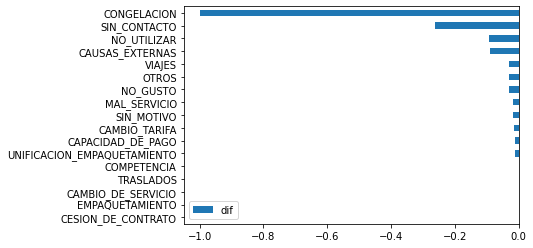

In [172]:
# Diferencia entre críticos y normales
resumen_causa_nor[['dif']].plot.barh()

## ARBOL

In [173]:
def visualizarArbol(model_fit,depth):
    fig, ax = plt.subplots(figsize=(depth*10,10))
    print(f"Profundidad del árbol: {tree_model.get_depth()}")
    print(f"Número de nodos terminales: {tree_model.get_n_leaves()}")
    plot = plot_tree(
                decision_tree = tree_model,
                feature_names = seleccionVariables,
                class_names   = ['normal','critico'],
                filled        = True,
                impurity      = False,
                fontsize      = 10,
                precision     = 3,
                ax            = ax
           )

Profundidad del árbol: 5
Número de nodos terminales: 6


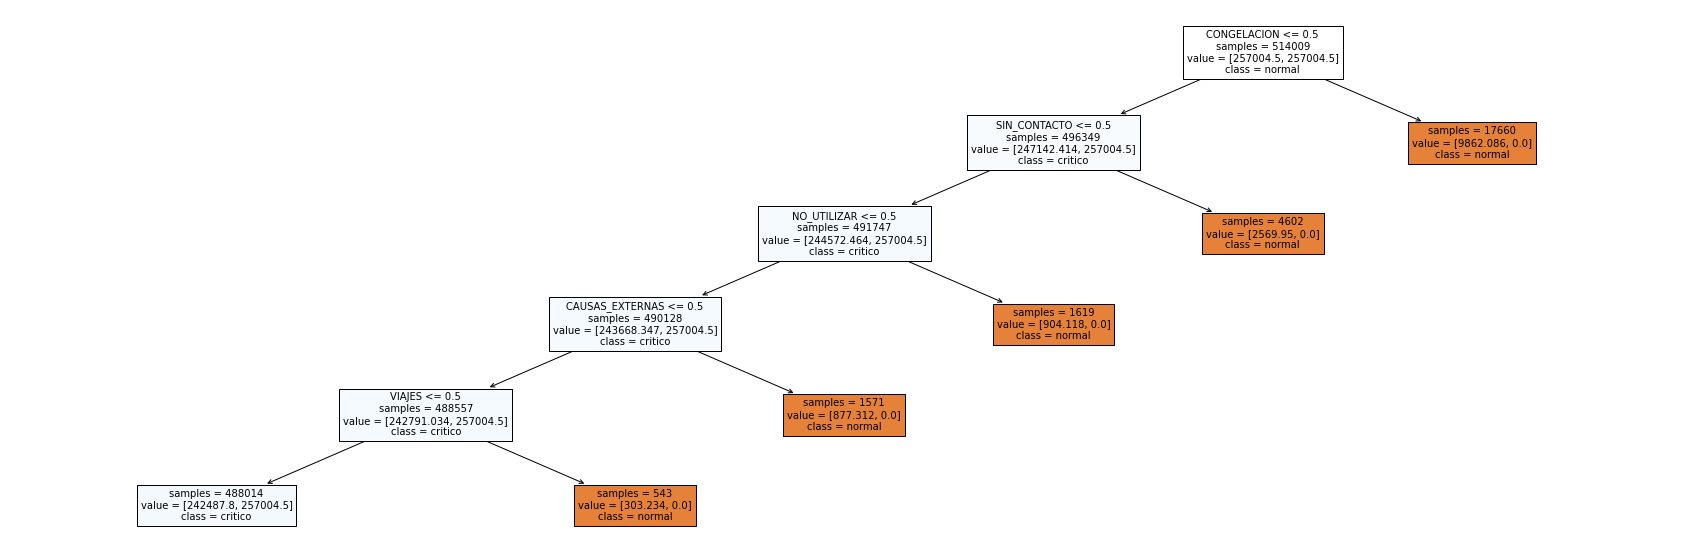

In [174]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5,min_samples_leaf=500, class_weight='balanced')
model_fit = tree_model.fit(X = data_causal[seleccionVariables], y = data_causal["ET"])
visualizarArbol(model_fit,3)